# **PREPARE**

In [230]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

# Task 1

## State whether the values match the description

- First, I will open the csv file.

In [231]:
df = pd.read_csv('food_claims_2212.csv')

- Next, I will check the criteria of the columns in the table.

In [232]:
df.head()

,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,R$ 74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,R$ 52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,R$ 24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,R$ 29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,R$ 19520.6,16251.06,RECIFE,11,False,vegetable


In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


- Look like the values match the description given. But I have to check the missing values in the table.

In [234]:
df.isna().sum()

claim_id                 0
time_to_close            0
claim_amount             0
amount_paid             36
location                 0
individuals_on_claim     0
linked_cases            26
cause                    0
dtype: int64

	-> It seems that columns 'amount_paid' and 'linked_cases' have not filled the missing values.

- Now, I will check whether columns 'time_to_close' and 'claim_amount' have been filled with the overall median values or not.

In [235]:
# Check whether columns 'time_to_close' have filled with the overall median values or not.
print(df['time_to_close'].median())

df.query("time_to_close == 179")

179.0


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
64,65,179,R$ 9503.79,6832.72,RECIFE,5,True,vegetable
122,123,179,R$ 27920.03,26554.13,SAO LUIS,11,True,meat
135,136,179,R$ 26052.69,18925.55,NATAL,13,True,vegetable
216,217,179,R$ 37996.13,28510.11,RECIFE,8,True,unknown
252,253,179,R$ 11621.49,8529.47,SAO LUIS,6,True,vegetable
375,376,179,R$ 20564.56,17231.05,RECIFE,7,False,meat
395,396,179,R$ 20726.19,20141.71,NATAL,8,False,meat
517,518,179,R$ 9529.28,9247.63,NATAL,4,False,meat
573,574,179,R$ 20893.96,15732.51,RECIFE,4,False,unknown
590,591,179,R$ 15809.25,11346.88,RECIFE,3,True,unknown


	-> The median value of 'time_to_close' is 179. There are 31 rows of 'time_to_close' which equal 179. It seems that the missing values have been filled with this number.

In [236]:
# Check whether columns 'claim_amount' have filled with the overall median values or not.
df2 = df                                                # Create df2 (same as df)
df2['claim_amount'] = df2['claim_amount'].str[3:]       # Substring 'claim_amount' to ignore 3 first characters
df2.head()



,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.2,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.6,16251.06,RECIFE,11,False,vegetable


In [237]:
df2["claim_amount"] = pd.to_numeric(df2["claim_amount"])   # Convert to number type 
print(df2.info())                                          # Check 'claim_amount' data type
print(df2["claim_amount"].median())                        # Result: 24821.085
df2 = df2.sort_values(by=['claim_amount'])                 # Sort df2 by 'new_claim_amount' 
df2 = df2.reset_index(drop=True)                           # Reset the index of df2
df2.iloc[996:1005]         #(index starts from 0)          # Select rows from 997th to 1005th 

# Because there are 2000 rows, the median() function will take value equals (1000th + 1001th)/2
# I select rows from 997th to 1005th. It seems that there are no missing values(need to be filled) in 'claim_amount' because I don't see any similar values.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(2), int64(3), object(3)
memory usage: 125.1+ KB
None
24821.085


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
996,171,192,24799.21,20558.99,RECIFE,8,False,meat
997,997,176,24800.01,18738.37,NATAL,7,False,meat
998,1919,140,24807.37,18845.48,NATAL,13,False,vegetable
999,317,199,24811.98,16741.71,SAO LUIS,7,False,meat
1000,758,187,24830.19,19036.44,RECIFE,13,True,vegetable
1001,1956,156,24848.83,20360.09,NATAL,6,False,unknown
1002,1225,174,24854.02,24406.15,RECIFE,10,True,meat
1003,931,177,24906.03,18876.23,RECIFE,5,False,unknown
1004,927,232,24943.51,24007.42,NATAL,10,False,meat


	-> It seems that there are no missing values(need to be filled) in 'claim_amount' because I don't see any similar values 

- Check to ensure only positive values appear in 'time_to_close'

In [238]:
df3 = df
df3 = df3.sort_values(by=['time_to_close'])
df3['time_to_close'].iloc[0:10]

356     76
1747    82
286     84
1976    84
1297    87
1854    88
1759    89
844     90
1047    91
1021    92
Name: time_to_close, dtype: int64

	-> So, all values in 'time_to_close' are positive.

- Check any values have been replaced with 0 in 'individuals_on_claim'

In [239]:
df['individuals_on_claim'].value_counts()

12    156
2     156
8     154
7     152
3     150
9     142
4     142
13    139
11    137
5     137
10    135
6     123
14    121
15     99
1      57
Name: individuals_on_claim, dtype: int64

	-> As we can see, there no value equals 0. It seems that there are no missing values(need to be filled) in 'individuals_on_claim'

- Similarly, I will check 'location', 'linked_cases' and 'cause'

In [240]:
print('COUNT VALUES OF LOCATION')
print(df['location'].value_counts())
print('\nCOUNT VALUES OF LINKED_CASES')
print(df['linked_cases'].value_counts())
print('\nCOUNT VALUES OF CAUSE')
print(df['cause'].value_counts())

COUNT VALUES OF LOCATION
RECIFE       885
SAO LUIS     517
FORTALEZA    311
NATAL        287
Name: location, dtype: int64

COUNT VALUES OF LINKED_CASES
False    1493
True      481
Name: linked_cases, dtype: int64

COUNT VALUES OF CAUSE
meat          943
unknown       713
vegetable     314
VEGETABLES     16
 Meat          14
Name: cause, dtype: int64


	-> There are 4 location types, as expected.
	-> 'linked_cases' has no unexpected value. But the missing values have not been filled. (1493 + 481 < 2000)
	-> 'cause' has 2 unexpected values are "Meat" and "VEGETABLES".

- Check column 'claim_id'

In [241]:
df4 = df
df4 = df4['claim_id'].value_counts()
df4.info()

<class 'pandas.core.series.Series'>
Int64Index: 2000 entries, 1 to 2000
Series name: claim_id
Non-Null Count  Dtype
--------------  -----
2000 non-null   int64
dtypes: int64(1)
memory usage: 31.2 KB


	-> Since the df4 has 2000 rows, every values in 'claim_id' is unique.

## Conclude:

	- 'claim_id' has unique value.
    - 'time_to_close' have filled the missing values and all values are positive.
    - 'claim_amount' has no missing values(need to be filled).
    - 'amount_paid' have not filled the missing values.
    - 'location' has 4 types, as expected.
    - 'individuals_on_claim' has no value '0' -> it has no missing values(need to be filled), minimum value is 1.
    - 'linked_cases' has no outlier value. But the missing values have not been filled.
    - 'cause' has 2 unexpected values are "Meat" and "VEGETABLES" (due to spelling mistakes).

## Create 'clean_df'

In [242]:
clean_df = pd.read_csv('food_claims_2212.csv')
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   object 
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          1974 non-null   object 
 7   cause                 2000 non-null   object 
dtypes: float64(1), int64(3), object(4)
memory usage: 125.1+ KB


- Replaced missing values in 'linked_cases' with 'FALSE'

In [243]:
clean_df['linked_cases'] = clean_df['linked_cases'].fillna(False)
clean_df['linked_cases'].value_counts()

False    1519
True      481
Name: linked_cases, dtype: int64

- Change values which due to spelling mistake in 'cause'

In [244]:
clean_df['cause'] = clean_df['cause'].replace([" Meat","VEGETABLES"],["meat",'vegetable'])
clean_df['cause'].value_counts()

meat         957
unknown      713
vegetable    330
Name: cause, dtype: int64

	-> Now, column 'cause' has 3 values as expected.

- Next, I will change data type of column 'claim_amount' from chr to dbl (which means I will ignore the currency).

In [245]:
clean_df['claim_amount'] = clean_df['claim_amount'].str[3:]
clean_df["claim_amount"] = pd.to_numeric(clean_df["claim_amount"])
clean_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           1964 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 111.5+ KB


- Replace missing values in 'amount_paid' with the overall median amount paid.

In [246]:
print(round(clean_df['amount_paid'].median(),2))    # Caculate the median amount paid value and round to 2 decimal places
# Result = 20105.70

clean_df['amount_paid'] = clean_df['amount_paid'].fillna(20105.7) # Replace missing values with the overall median amount paid.
clean_df.query('amount_paid == 20105.7')

# There are 36 rows has amount_paid = 20105.7 which means that all missing values have been replaced

20105.7


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
32,33,184,26030.25,20105.7,NATAL,7,True,unknown
112,113,359,50309.90,20105.7,FORTALEZA,13,False,unknown
173,174,322,36079.44,20105.7,NATAL,12,False,meat
178,179,183,28196.45,20105.7,SAO LUIS,7,True,unknown
206,207,230,38209.72,20105.7,FORTALEZA,10,False,unknown
319,320,166,7818.63,20105.7,SAO LUIS,5,True,vegetable
472,473,327,53783.47,20105.7,RECIFE,14,False,unknown
495,496,183,29691.61,20105.7,FORTALEZA,8,False,meat
513,514,307,33311.48,20105.7,SAO LUIS,8,False,unknown
575,576,169,12871.81,20105.7,RECIFE,4,False,meat


- Make sure to round values in 'claim_amount' and 'amount_paid' to 2 decimal places.

In [247]:
clean_df['claim_amount'] = clean_df['claim_amount'].round(2)
clean_df['amount_paid'] = clean_df['amount_paid'].round(2)

- Now, let's have a look at 'clean_table' (It must be much more clean than the original one)

In [248]:
clean_df.info()
print(clean_df.isna().sum())
clean_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   claim_id              2000 non-null   int64  
 1   time_to_close         2000 non-null   int64  
 2   claim_amount          2000 non-null   float64
 3   amount_paid           2000 non-null   float64
 4   location              2000 non-null   object 
 5   individuals_on_claim  2000 non-null   int64  
 6   linked_cases          2000 non-null   bool   
 7   cause                 2000 non-null   object 
dtypes: bool(1), float64(2), int64(3), object(2)
memory usage: 111.5+ KB
claim_id                0
time_to_close           0
claim_amount            0
amount_paid             0
location                0
individuals_on_claim    0
linked_cases            0
cause                   0
dtype: int64


,claim_id,time_to_close,claim_amount,amount_paid,location,individuals_on_claim,linked_cases,cause
0,1,317,74474.55,51231.37,RECIFE,15,False,unknown
1,2,195,52137.83,42111.30,FORTALEZA,12,True,unknown
2,3,183,24447.20,23986.30,SAO LUIS,10,True,meat
3,4,186,29006.28,27942.72,FORTALEZA,11,False,meat
4,5,138,19520.60,16251.06,RECIFE,11,False,vegetable


# Task 2

In [249]:
df4 = clean_df['location'].value_counts()
df4 = df4.sort_index()
df4

FORTALEZA    311
NATAL        287
RECIFE       885
SAO LUIS     517
Name: location, dtype: int64

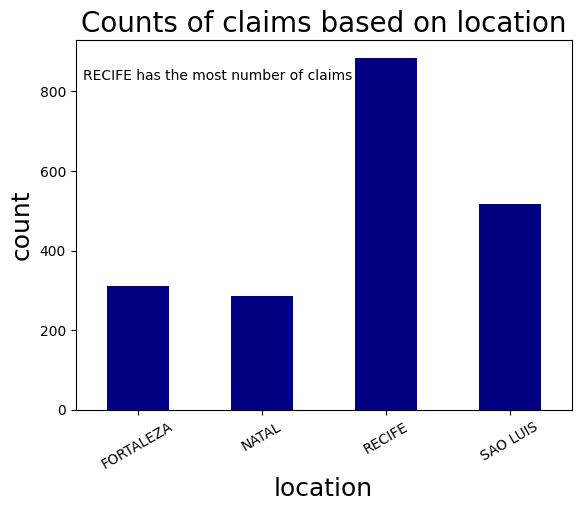

In [250]:

df4.plot.bar(color = 'navy')

plt.xticks(rotation=30, horizontalalignment="center")
plt.title("Counts of claims based on location",fontsize = 20)
plt.xlabel("location", fontsize = 18)
plt.ylabel("count", fontsize = 18)
plt.annotate('RECIFE has the most number of claims',(-0.44,830))

plt.show()


# Task 3

In [251]:
df5 = clean_df['time_to_close']
df5.value_counts()

176    45
180    44
178    39
182    36
175    36
       ..
406     1
350     1
518     1
90      1
269     1
Name: time_to_close, Length: 256, dtype: int64

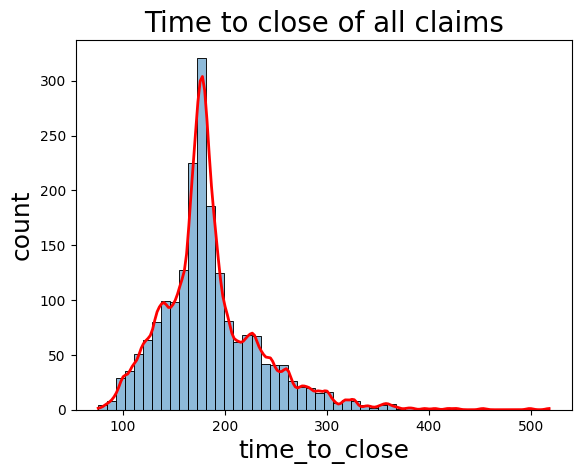

In [252]:
sns.histplot(df5, kde=True, bins=50,
             kde_kws = {'bw_adjust': 0.3},
             line_kws = {'linewidth':'2'}).lines[0].set_color('red')

plt.title("Time to close of all claims",fontsize = 20)
plt.xlabel("time_to_close", fontsize = 18)
plt.ylabel("count", fontsize = 18)

plt.show()

# Task 4

In [253]:
df6 = clean_df.loc[:,['time_to_close','location']]
df6 = df6.sort_values(by=['location'])
df6

,time_to_close,location
428,169,FORTALEZA
1094,216,FORTALEZA
1652,102,FORTALEZA
879,189,FORTALEZA
783,105,FORTALEZA
...,...,...
427,144,SAO LUIS
1591,134,SAO LUIS
1592,195,SAO LUIS
1223,236,SAO LUIS


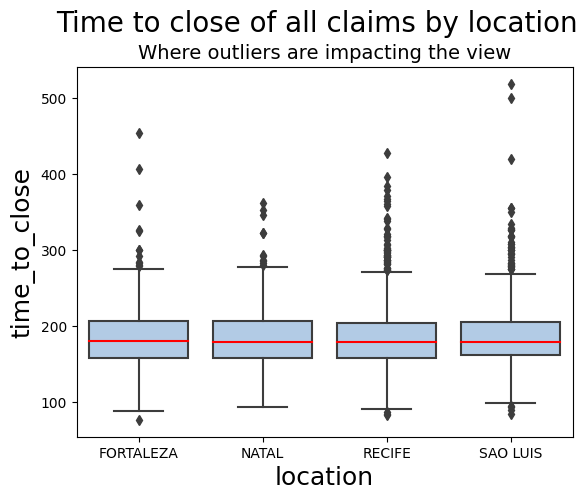

In [254]:

sns.boxplot(data = df6, x='location',y='time_to_close',
            medianprops={"color": "red"},
            boxprops={"facecolor": (.4, .6, .8, .5)})

plt.title("Where outliers are impacting the view",fontsize = 14)
plt.suptitle("Time to close of all claims by location",fontsize = 20,y=1)

plt.xlabel("location", fontsize = 18)
plt.ylabel("time_to_close", fontsize = 18)

plt.show()

In [255]:
df7 = df6.query('time_to_close < 400')

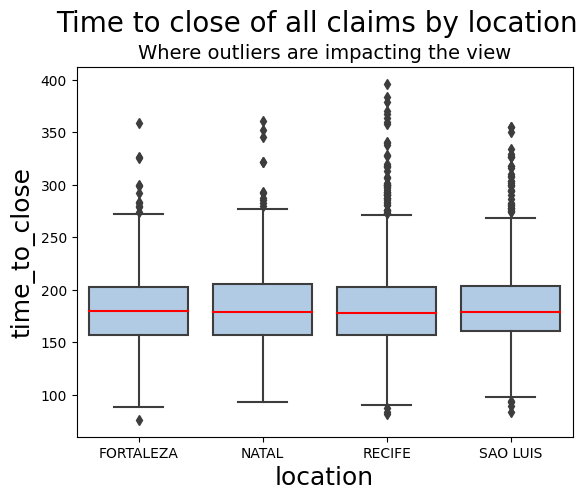

In [256]:
sns.boxplot(data = df7, x= 'location',y='time_to_close',
            medianprops={"color": "red"},
            boxprops={"facecolor": (.4, .6, .8, .5)})

plt.title("Where outliers are impacting the view",fontsize = 14)
plt.suptitle("Time to close of all claims by location",fontsize = 20,y=1)

plt.xlabel("location", fontsize = 18)
plt.ylabel("time_to_close", fontsize = 18)

plt.show()

# **ANSWER**

## Task 1

The original data is **2000 rows** and **8 columns**. The first thing I did was to check any missing values in the data. I found that 'amount_paid' and 'linked_cases' columns have not filled (62 rows contain missing values, 36 rows from 'amount_paid' and 26 rows from 'linked_cases'). So, I filled the missing values in 'amount_paid' with its overall median value and in 'linked_cases' with _FALSE_. Next, I checked to ensure that all values in 'time_to_close' are positive and values in 'location' has 4 types as expected. I also found that the minimum value in 'individuals_on_claim' is 1 (there are no value 0 which means there are no values had been filled). Column 'cause' has 2 unexpected values due to spelling mistakes. I changed these 2 values to their corresponding values (" Meat" to "meat", "VEGETABLES" to "vegetable"). Finally, I create a new table called 'clean_table' (2000 rows x 8 columns) which contains:

- 'claim_id' has unique value.
- 'time_to_close' have filled the missing values with its overall median value and all values are positive.
- 'claim_amount' was changed to dbl type(ignore the currency) and all values was rounded to 2 decimal places.
- 'amount_paid' was filled the missing values with its overall median value and all values was rounded to 2 decimal places.
- 'location' has 4 types, as expected.
- 'individuals_on_claim' has minimum value is 1.
- 'linked_cases' was filled the missing values with _FALSE_ and has 2 options - True/False.
- 'cause' has 3 types, as expected.

# Task 2

There are four locations included in this data. The location received the most number of claims is "RECIFE", with 'SAO LUIS' being second although with over a half the number of claims. This would suggest that the team should focus on increasing number of people in legal team to process in RECIFE as this place is more common.

![coc](coc.png)


# Task 3

As the legal team thinks that the time to close of a claim will be important, we should look at how long it takes to close claims is distributed. Looking at all claims, we can see that the majority of claims need approximately from 130 days to 190 days to close. There are some outliers that get more than 400 days but this is very uncommon. Thus, the team should prioritize to process claims lasting over 200 days and reduce the number of claims that took long time to close.

![ttcoac](ttcoac.png)


# Task 4

Finally we want to combine the two pieces of information to see how each location differs in the time it takes to close claims. So far the legal team should focus on claims lasting over 200 days but we need to look at the two variables together to see if this is realistic.

To show the impact, we can look at the range of time to close of claims by location with these outliers in the data. In the graphic below you can see that some outliers is dominating the data and making comparison difficult. To make it easier to compare the rest of the data, we will remove these outliers. 

![ttcoacbl](ttcoacbl.png)

After we remove the outliers we can focus on the main range of data. Although NATAL received the smallest number of claims, the interquartile range of time to close of claims is the highest. This would suggest that the majority of claims in NATAL may need more time to close than in others. However, RECIFE and SAO LUIS have much more outliers which are above their upper whisker than others. This means that long-time-claim in these 2 locations may bring the median up.

![ttcoacbl2](ttcoacbl2.png)

Based on all of the above, we would recommend that the legal team focus to process claims lasting over 200 days and reduce the number of claims that took long time to close. Further analysis should be done to understand if there are any relationship between time to close and location. The legal team should also improve the quality in RECIFE due to the largest number of claims come from this location.